In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [15]:
import math                                        
import numpy as np                                 
import matplotlib.pyplot as plt                    

In [16]:
g = 9.8

init_z = State(y=100.0 , v=0.0 )
init_x = State(y=0.0 , v=500.0 )

t_0=0
t_end = 6 
dt = 1 

system_z = System(init=init_z, t_0=t_0,g=g, t_end=t_end, dt=dt)
system_x = System(init=init_x,t_0=t_0, t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0
    
    return dydt, dvdt

Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)

In [17]:
def runge_kutta(y, x, h, f):                      
    """ y 函数初值
        x 自变量初值
        h 自变量步长
        f 函数求导
    """                                            
    k1 = h * f(y, t)
    k2 = h * f(y + 0.5 * k1, x + 0.5 * h)
    k3 = h * f(y + 0.5 * k2, x + 0.5 * h)
    k4 = h * f(y + k3, x + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.    

In [18]:
def Adams(a,b,c,d,h,f):
    j=-9.* f(a,t)
    k=37* f(b,t)
    l=- 59 * f(c,t)
    w=55* f(d,t)
    g=d +h* [j + k + l + w] / 24.
    return g                     

In [19]:
if __name__=='__main__':                          
    t = 0.                                                                             
    y = 100
    dt = 0.01
    ys, ts = [], []                                
    def func(y, t):                               
        return  -1*math.sqrt(2*g*y)
    while t <= 0.4:                                
        y = runge_kutta(y, t, dt, func)            
        t += dt
        ys.append(y)
        ts.append(t)                               
    i=0                                            
    while i<=30 :                                  
        a=ys[i+0]
        b=ys[i+1]
        c=ys[i+2]
        d=ys[i+3]
        y = Adams(a,b,c,d,dt,func)
        t += dt
        ys.append(y)
        ts.append(t)                               
        i=i+1

TypeError: can't multiply sequence by non-int of type 'float'

In [20]:
exact = [100-0.5*g*t*t for t in ts]

[99.99951,
 99.99804,
 99.99559,
 99.99216,
 99.98775,
 99.98236,
 99.97599,
 99.96864,
 99.96031,
 99.951,
 99.94071,
 99.92944,
 99.91719,
 99.90396,
 99.88975,
 99.87456,
 99.85839,
 99.84124,
 99.82311,
 99.804,
 99.78391,
 99.76284,
 99.74079,
 99.71776,
 99.69375,
 99.66876,
 99.64279,
 99.61584,
 99.58791,
 99.559,
 99.52911,
 99.49824,
 99.46639,
 99.43356,
 99.39975,
 99.36496,
 99.32919,
 99.29244,
 99.25471,
 99.216]

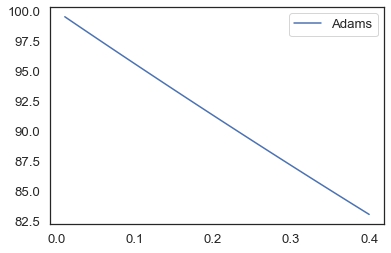

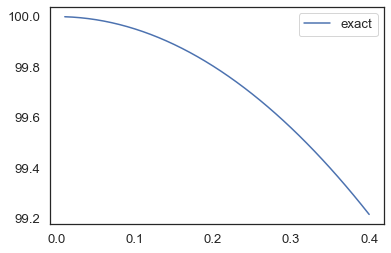

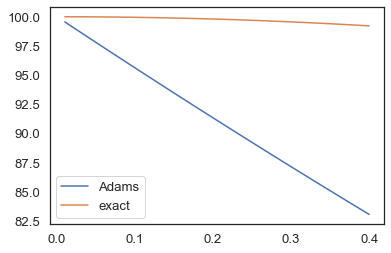

In [21]:
plt.plot(ts, ys, label='Adams')         
plt.legend()
plt.show()
plt.plot(ts, exact, label='exact')
plt.legend()
plt.show()
plt.plot(ts, ys, label='Adams')          
plt.plot(ts, exact, label='exact')
plt.legend()
plt.show()